In [51]:
import pandas as pd
import numpy as np

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
from skimpy import skim


In [4]:
df_customers = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/customers.csv", sep=";")
df_products = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/products.csv", sep=";")
df_transactions = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/Transactions.csv", sep=";")

In [5]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [6]:
df_products.head(20)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
5,0_1163,9.99,0
6,1_463,36.99,1
7,0_2157,34.99,0
8,0_1915,16.99,0
9,0_389,18.99,0


In [7]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [8]:
skim(df_customers)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8621   │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean   ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ birth            │    0 │      0 │   1978 │    16.92 │   1929 │   1966 │   1979 │   1992 │  2004 │ ▁▂▅▇▇▇  │  │
│ └──────────────────┴──────┴────────┴────────┴──────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ client_id                 │       0 │          0 │                            1 │                     8621 │  │
│ │ sex                       │       0 │          0 │                            1 │                     8621 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [9]:
skim(df_products)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3286   │ │ string      │ 1     │                                                          │
│ │ Number of columns │ 3      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ price           │   0 │      0 │    21.86 │    29.85 │   0.62 │   6.99 │  13.07 │  22.99 │   300 │    ▇    │  │
│ │ categ           │   0 │      0 │   0.3704 │   0.6154 │      0 │      0 │      0 │      1 │     2 │ ▇  ▃ ▁  │  │
│ └─────────────────┴─────┴────────┴──────────┴──────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ id_prod                   │       0 │          0 │                            1 │                     3286 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [10]:
skim(df_transactions)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 687534 │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 4      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ id_prod                   │       0 │          0 │                            1 │                   687534 │  │
│ │ date                      │       0 │          0 │                            2 │                  1375068 │  │
│ │ session_id                │       0 │          0 │                            1 │                   687534 │  │
│ │ client_id                 │       0 │          0 │                            1 │                   687534 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [11]:
df_merged= pd.merge(df_transactions, df_products, on='id_prod', how='left')

df_full = pd.merge(df_merged, df_customers, on='client_id', how='left')
df_full.head(20)

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0,f,1967
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0,m,1960
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0,m,1988
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0,f,1989
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0,f,1956
5,0_1073,2021-03-01 00:05:44.999018,s_6,c_4908,13.99,0,f,1981
6,0_1304,2021-03-01 00:07:04.371179,s_7,c_1609,5.86,0,m,1980
7,0_279,2021-03-01 00:07:48.507530,s_6,c_4908,16.99,0,f,1981
8,1_445,2021-03-01 00:09:11.523122,s_8,c_7991,23.99,1,m,1968
9,1_556,2021-03-01 00:10:20.265265,s_9,c_6171,24.47,1,m,1983


In [12]:

df_transactions['date'] = df_transactions['date'].str.replace(r'24:(\d{2}:\d{2}\.\d+)', r'00:\1', regex=True)
df_full['date'] = pd.to_datetime(df_full['date'], errors='coerce')

In [13]:
# On recupere la dates d'aujourd'hui
today = pd.to_datetime('today')

In [20]:
rfm = df_full.groupby('client_id').agg(
    {
        'date': lambda x: (today - x.max()).days,
        'id_prod': 'count', # revoir calcul de la frequence 'par session'
        'price': 'sum',
        }
    ).rename(columns={
        'date': 'recency',
        'id_prod': 'frequency',
        'price': 'monetary'
        }
    ).reset_index()

In [58]:
df_rfm = rfm[rfm['monetary'] < 3500]
df_rfm

,client_id,recency,frequency,monetary
0,c_1,499,43,629.02
1,c_10,488,58,1353.60
2,c_100,617,8,254.85
3,c_1000,490,126,2291.88
4,c_1001,460,103,1823.85
...,...,...,...,...
8595,c_995,554,14,189.41
8596,c_996,463,96,1637.34
8597,c_997,479,59,1490.01
8598,c_998,461,55,2822.22


In [59]:
rfm.sort_values(by='monetary', ascending=False).head(10)

,client_id,recency,frequency,monetary
677,c_1609,455,25586,326039.89
4388,c_4958,455,5222,290227.03
6337,c_6714,455,9199,153918.60
2724,c_3454,455,6793,114110.57
634,c_1570,462,370,5285.82
2513,c_3263,458,403,5276.87
1268,c_2140,455,405,5260.18
2108,c_2899,463,105,5214.05
7006,c_7319,458,371,5155.77
7715,c_7959,457,372,5135.75


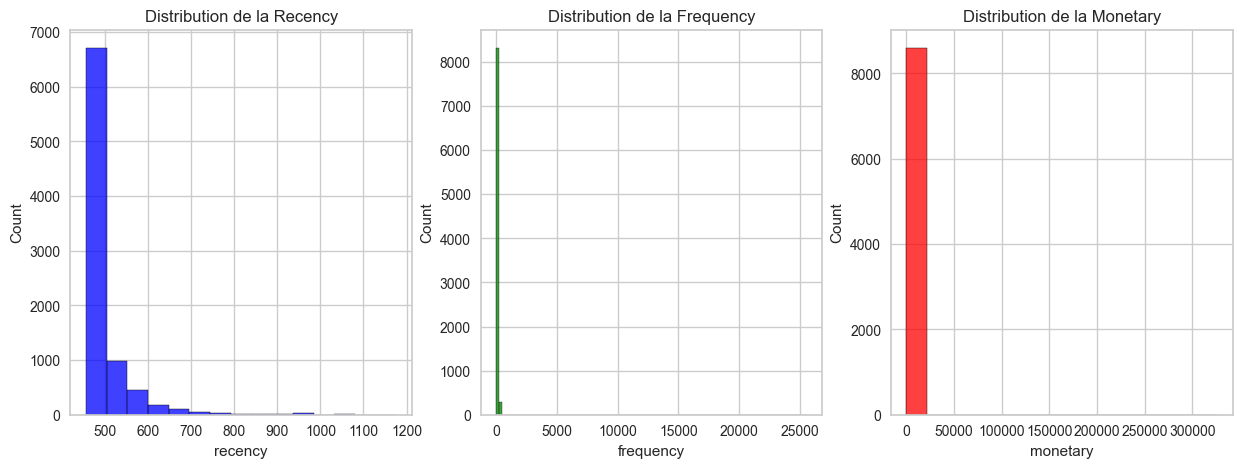

In [40]:
# On créé 3 histogrammes pour voir la distribution de chaque colonnes

figs, axs = plt.subplots(1,3, figsize=(15,5))

sns.histplot(
    rfm['recency'],
    ax=axs[0],
    color='blue',
    bins="sturges",
)
axs[0].set_title('Distribution de la Recency')

sns.histplot(
    rfm['frequency'],
    ax=axs[1],
    color='green',
    bins=100,
)
axs[1].set_title('Distribution de la Frequency')

sns.histplot(
    rfm['monetary'],
    ax=axs[2],
    color='red',
    bins='sturges',
)
axs[2].set_title('Distribution de la Monetary')

# axs[2].set_xlim(0, 100000)

plt.show()

C:\Users\pnii\AppData\Local\Temp\ipykernel_14348\790482567.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


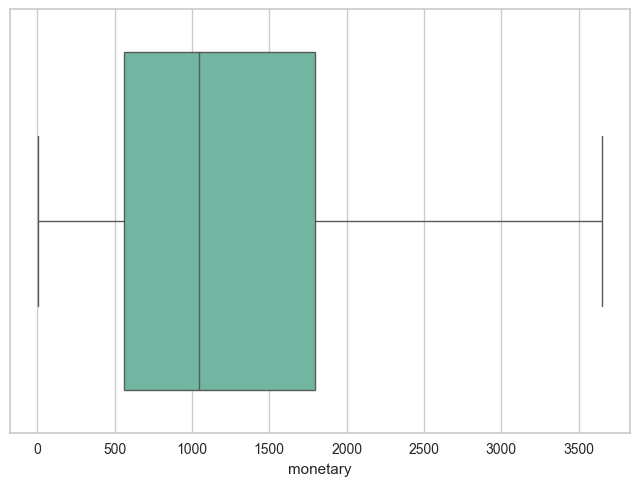

In [56]:
# Ecarter les outliers
sns.boxplot(
    data=rfm,
    orient='h',
    palette='Set2',
    x='monetary',
    showfliers=False,
)

plt.show()

In [17]:
scaler_std = StandardScaler()

In [18]:
X_scaled = scaler_std.fit_transform(rfm[['recency', 'frequency', 'monetary']])
X_scaled

array([[ 0.08128497, -0.11784419, -0.14791928],
       [-0.08692517, -0.06999945, -0.0086431 ],
       [ 1.88572106, -0.22948192, -0.21984089],
       ...,
       [-0.22455165, -0.0668098 ,  0.01757714],
       [-0.49980461, -0.0795684 ,  0.27364978],
       [-0.31630264, -0.10827524, -0.13400665]])

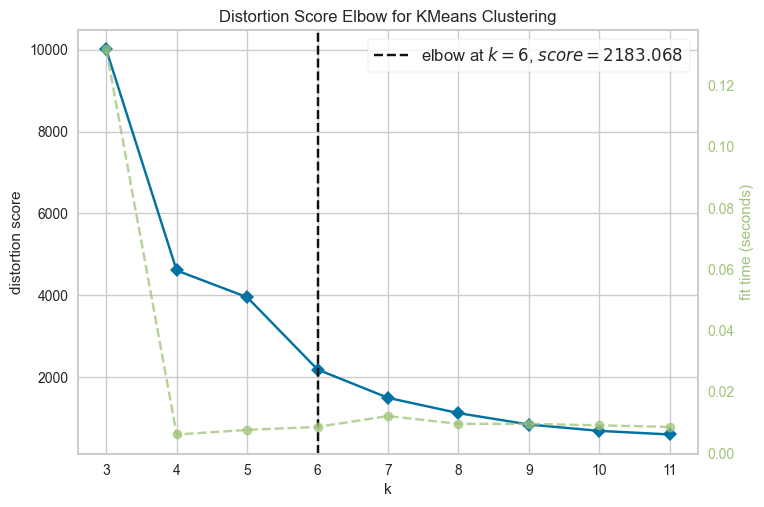

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
model = KMeans(n_clusters=3, random_state=42, n_init='auto')

visualizer = KElbowVisualizer(model, k=(3,12))
visualizer.fit(X_scaled)
visualizer.show()